### `Project - MovieLens Data Analysis`

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.

### `Objective:`
- To implement the techniques learnt as a part of the course.

### `Datasets Information:`

*rating.csv:* It contains information on ratings given by the users to a particular movie.
- user id: id assigned to every user
- movie id: id assigned to every movie
- rating: rating given by the user
- timestamp: Time recorded when the user gave a rating

*movie.csv:* File contains information related to the movies and their genre.
- movie id: id assigned to every movie
- movie title: Title of the movie
- release date: Date of release of the movie
- Action: Genre containing binary values (1 - for action 0 - not action)
- Adventure: Genre containing binary values (1 - for adventure 0 - not adventure)
- Animation: Genre containing binary values (1 - for animation 0 - not animation)
- Children’s: Genre containing binary values (1 - for children's 0 - not children's)
- Comedy: Genre containing binary values (1 - for comedy 0 - not comedy)
- Crime: Genre containing binary values (1 - for crime 0 - not crime)
- Documentary: Genre containing binary values (1 - for documentary 0 - not documentary)
- Drama: Genre containing binary values (1 - for drama 0 - not drama)
- Fantasy: Genre containing binary values (1 - for fantasy 0 - not fantasy)
- Film-Noir: Genre containing binary values (1 - for film-noir 0 - not film-noir)
- Horror: Genre containing binary values (1 - for horror 0 - not horror)
- Musical: Genre containing binary values (1 - for musical 0 - not musical)
- Mystery: Genre containing binary values (1 - for mystery 0 - not mystery)
- Romance: Genre containing binary values (1 - for romance 0 - not romance)
- Sci-Fi: Genre containing binary values (1 - for sci-fi 0 - not sci-fi)
- Thriller: Genre containing binary values (1 - for thriller 0 - not thriller)
- War: Genre containing binary values (1 - for war 0 - not war)
- Western: Genre containing binary values (1 - for western - not western)


*user.csv:* It contains information of the users who have rated the movies.
- user id: id assigned to every user
- age: Age of the user
- gender: Gender of the user
- occupation: Occupation of the user
- zip code: Zip code of the use

**`Please provide your insights wherever necessary.`**

### `Learning Outcomes:`
- Exploratory Data Analysis

- Visualization using Python

- Pandas – groupby, merging 


### `Domain` 
- Internet and Entertainment

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

In [63]:
import warnings
warnings.filterwarnings('ignore')

### 1. Import the necessary packages - 2.5 marks

In [2]:
#your code here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler, MinMaxScaler

### 2. Read the 3 datasets into dataframes - 2.5 marks

In [3]:
#your code here

df_user=pd.read_csv("C:\\GreatLearning\\user.csv")
df_data=pd.read_csv("C:\\GreatLearning\\Data.csv")
df_item=pd.read_csv("C:\\GreatLearning\\item.csv")

In [4]:
df_user.head(5)

,user id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [5]:
df_data.head(5)

,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [6]:
df_item.head(5)

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


### 3. Apply info, shape, describe, and find the number of missing values in the data. Present at least 3 observations from these operations - 2.5 marks
 - Note that you will need to do it for all the three datasets seperately

In [7]:
#your code here
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB


In [8]:
df_user.shape

(943, 5)

In [9]:
df_user.describe()

,user id,age
count,943.000000,943.000000
mean,472.000000,34.051962
std,272.364951,12.192740
min,1.000000,7.000000
25%,236.500000,25.000000
50%,472.000000,31.000000
75%,707.500000,43.000000
max,943.000000,73.000000


In [10]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user id    100000 non-null  int64
 1   movie id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [11]:
df_data.shape

(100000, 4)

In [12]:
df_data.describe()

,user id,movie id,rating,timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


In [13]:
df_item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie id      1681 non-null   int64 
 1   movie title   1681 non-null   object
 2   release date  1681 non-null   object
 3   unknown       1681 non-null   int64 
 4   Action        1681 non-null   int64 
 5   Adventure     1681 non-null   int64 
 6   Animation     1681 non-null   int64 
 7   Childrens     1681 non-null   int64 
 8   Comedy        1681 non-null   int64 
 9   Crime         1681 non-null   int64 
 10  Documentary   1681 non-null   int64 
 11  Drama         1681 non-null   int64 
 12  Fantasy       1681 non-null   int64 
 13  Film-Noir     1681 non-null   int64 
 14  Horror        1681 non-null   int64 
 15  Musical       1681 non-null   int64 
 16  Mystery       1681 non-null   int64 
 17  Romance       1681 non-null   int64 
 18  Sci-Fi        1681 non-null   int64 
 19  Thrill

In [14]:
df_item.shape

(1681, 22)

In [15]:
df_item.describe()


,movie id,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
count,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000
mean,841.841761,0.000595,0.149316,0.080309,0.024985,0.072576,0.300416,0.064842,0.029744,0.431291,0.013087,0.014277,0.054729,0.033314,0.036288,0.146936,0.060083,0.149316,0.042237,0.016062
std,485.638077,0.024390,0.356506,0.271852,0.156126,0.259516,0.458576,0.246321,0.169931,0.495404,0.113683,0.118667,0.227519,0.179507,0.187061,0.354148,0.237712,0.356506,0.201189,0.125751
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,422.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,842.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1262.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1682.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Observations:**



### 4. Find the number of movies per genre using the item data - 2.5 marks

In [16]:
#your code here
df_genre = df_item.iloc[:,3:]
df_genre[df_genre == 1].sum(axis=0)


unknown          1.0
Action         251.0
Adventure      135.0
Animation       42.0
Childrens      122.0
Comedy         505.0
Crime          109.0
Documentary     50.0
Drama          725.0
Fantasy         22.0
Film-Noir       24.0
Horror          92.0
Musical         56.0
Mystery         61.0
Romance        247.0
Sci-Fi         101.0
Thriller       251.0
War             71.0
Western         27.0
dtype: float64

**Insights:**



### 5. Drop the movie where the genre is unknown - 2.5 marks

In [17]:
#your code here
df_item = df_item.drop(df_item[df_item.unknown == 1].index)

In [18]:
df_genre = df_item.iloc[:,3:]
df_genre[df_genre == 1].sum(axis=0)

unknown          0.0
Action         251.0
Adventure      135.0
Animation       42.0
Childrens      122.0
Comedy         505.0
Crime          109.0
Documentary     50.0
Drama          725.0
Fantasy         22.0
Film-Noir       24.0
Horror          92.0
Musical         56.0
Mystery         61.0
Romance        247.0
Sci-Fi         101.0
Thriller       251.0
War             71.0
Western         27.0
dtype: float64

**Insights:**


### 6. Find the movies that have more than one genre - 5 marks

hint: use sum on the axis = 1

Display movie name, number of genres for the movie in dataframe

and also print(total number of movies which have more than one genres)

In [19]:
df_item["sum"]=df_item.iloc[:, [3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]].sum(axis=1)
# df_item.head()
df_item[df_item["sum"]>1].iloc[:,[1,22]]

,movie title,sum
0,Toy Story,3
1,GoldenEye,3
3,Get Shorty,3
4,Copycat,3
6,Twelve Monkeys,2
...,...,...
1667,MURDER and murder,3
1668,Tainted,2
1671,Mirage,2
1677,B. Monkey,2


**Insights:**



### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

*HINT: Use distplot for age and countplot for release year, ratings, *

*HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split() as depicted below or you could convert it to pandas datetime format and extract year (.dt.year)*

In [20]:
a = 'My*cat*is*brown'
print(a.split('*')[3])

#similarly, the release year needs to be taken out from release date

#also you can simply slice existing string to get the desired data, if we want to take out the colour of the cat

print(a[10:])
print(a[-5:])

brown
brown
brown


In [21]:
#your code here

## df[df['fruit'] == 'apple'].merge(df1, on='date')
## dt.year(df_item['release date'])
## df_item["release date"].year
df_item['year']=pd.DatetimeIndex(df_item["release date"]).year

In [22]:
df_item.head()

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,sum,year
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,3,1995
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,3,1995
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1995
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,3,1995
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,3,1995


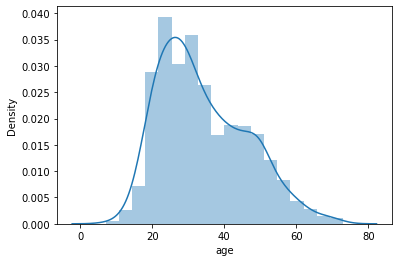

In [64]:
sns.distplot(df_user['age'])         
plt.show()

In [24]:
df_data

,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


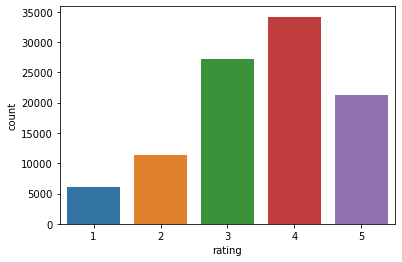

In [65]:
sns.countplot(df_data['rating'])         
plt.show()

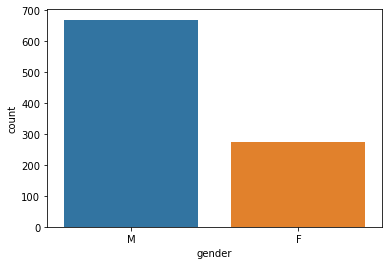

In [66]:
sns.countplot(df_user['gender'])         
plt.show()

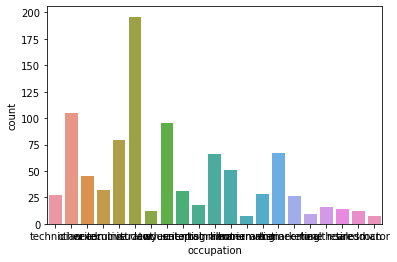

In [67]:
sns.countplot(df_user['occupation'])         
plt.show()

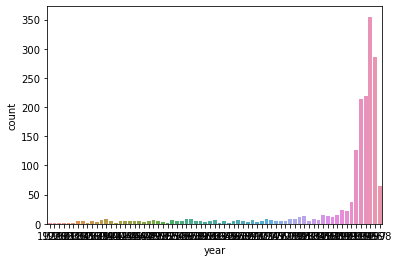

In [68]:
sns.countplot(df_item['year'])         
plt.show()

### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the **percent of number of releases in a year** as a parameter of popularity of a genre

Hint 1: You need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa. (Drop unnecessary column if there are any)

Hint 2: Find the total number of movies release in a year(use item dataset to get count of movies released in a particular year, store that value in a new column as 'total'). Now divide the value of each genre in that year by total to get percentage number of release in a particular year.
`(df.div(df['total'], axis= 0) * 100)`

Once that is achieved, you can either use univariate plots or can use the heatmap to visualise all the changes over the years 
in one go. 

Hint 3: Use groupby on the relevant column and use sum() on the same to find out the number of releases in a year/genre.

In [29]:
#your code here
df_item['Total'] = df_item.groupby(["year"])["movie id"].transform("count")


In [30]:
df_item.groupby(["year"])["movie id"].transform("count")

0       219
1       219
2       219
3       219
4       219
       ... 
1676     65
1677     65
1678     65
1679    214
1680    355
Name: movie id, Length: 1680, dtype: int64

In [31]:
df_item

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,sum,year,Total
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,3,1995,219
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,3,1995,219
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1995,219
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,3,1995,219
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,3,1995,219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1676,1678,Mat' i syn,06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1998,65
1677,1679,B. Monkey,06-Feb-1998,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,2,1998,65
1678,1680,Sliding Doors,01-Jan-1998,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,2,1998,65
1679,1681,You So Crazy,01-Jan-1994,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,1994,214


In [32]:
# df_item['percent_genre'] = (df_item.div(df_item['Total'].astype(float), axis= 0) * 100)
df_item['percent_genre'] = (df_item['sum'] / df_item['Total']) * 100
# df_item['percent_genre'] = (df_item.iloc[:, 3:21].div(df_item['Total'].astype(float), axis= 0) * 100)
df_item

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Mystery,Romance,Sci-Fi,Thriller,War,Western,sum,year,Total,percent_genre
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,3,1995,219,1.369863
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,1,0,0,3,1995,219,1.369863
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,1995,219,0.456621
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,3,1995,219,1.369863
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,1,0,0,3,1995,219,1.369863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1676,1678,Mat' i syn,06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1998,65,1.538462
1677,1679,B. Monkey,06-Feb-1998,0,0,0,0,0,0,0,...,0,1,0,1,0,0,2,1998,65,3.076923
1678,1680,Sliding Doors,01-Jan-1998,0,0,0,0,0,0,0,...,0,1,0,0,0,0,2,1998,65,3.076923
1679,1681,You So Crazy,01-Jan-1994,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,1994,214,0.467290


In [33]:
df_item_year = pd.DataFrame(df_item.groupby('year').sum())
df_item_year

,movie id,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,...,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,sum,Total,percent_genre
year,,,,,,,,,,,,,,,,,,,,,
1922,675,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,100.000000
1926,1542,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,1,100.000000
1930,617,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,1,100.000000
1931,656,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,3,1,300.000000
1932,1124,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,2,1,200.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,189000,0,30,13,4,15,82,8,9,97,...,2,2,35,7,25,7,6,353,45796,164.953271
1995,183514,0,40,22,6,21,63,11,5,89,...,3,5,37,15,39,5,2,381,47961,173.972603
1996,322295,0,44,24,9,21,108,21,18,170,...,9,6,38,15,47,9,2,559,126025,157.464789


In [34]:
df_item_year = df_item.groupby('year').sum().iloc[:, [1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]]
df_item_year['total'] = df_item.groupby('year').count().iloc[:, [1]]

In [35]:
df_item_year

,unknown,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,total
year,,,,,,,,,,,,,,,,,,,
1922,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1926,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1930,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1931,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1
1932,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,0,13,4,15,82,8,9,97,3,0,8,2,2,35,7,25,7,6,214
1995,0,22,6,21,63,11,5,89,3,1,14,3,5,37,15,39,5,2,219
1996,0,24,9,21,108,21,18,170,6,1,11,9,6,38,15,47,9,2,355


In [36]:
df_item_year1 = pd.DataFrame(df_item_year.iloc[:,1:18].div(df_item_year["total"], axis="index")* 100)

In [37]:
df_item_year1["sum"]=df_item_year1.iloc[:, :].sum(axis=1)

In [38]:
df_item_year1

,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,sum
year,,,,,,,,,,,,,,,,,,
1922,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000
1926,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000
1930,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000
1931,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,300.000000
1932,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,100.000000,0.000000,200.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,6.074766,1.869159,7.009346,38.317757,3.738318,4.205607,45.327103,1.401869,0.000000,3.738318,0.934579,0.934579,16.355140,3.271028,11.682243,3.271028,2.803738,150.934579
1995,10.045662,2.739726,9.589041,28.767123,5.022831,2.283105,40.639269,1.369863,0.456621,6.392694,1.369863,2.283105,16.894977,6.849315,17.808219,2.283105,0.913242,155.707763
1996,6.760563,2.535211,5.915493,30.422535,5.915493,5.070423,47.887324,1.690141,0.281690,3.098592,2.535211,1.690141,10.704225,4.225352,13.239437,2.535211,0.563380,145.070423


In [39]:
df_item_year

,unknown,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,total
year,,,,,,,,,,,,,,,,,,,
1922,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1926,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1930,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1931,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1
1932,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,0,13,4,15,82,8,9,97,3,0,8,2,2,35,7,25,7,6,214
1995,0,22,6,21,63,11,5,89,3,1,14,3,5,37,15,39,5,2,219
1996,0,24,9,21,108,21,18,170,6,1,11,9,6,38,15,47,9,2,355


**Insights:**



### 9. Find the top 25 movies in terms of average ratings for movies that have been rated more than 100 times - 10 marks

Hints : 

1. Find the count of ratings and average ratings for every movie.
2. Slice the movies which have ratings more than 100.
3. Sort values according to average rating such that movie which highest rating is on top.
4. Select top 25 movies.
5. You will have to use the .merge() function to get the movie titles.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [40]:
#your code here
# df_data_count = pd.DataFrame(df_data.groupby(['movie id']).mean())
df_mean = pd.DataFrame(df_data.groupby(['movie id']).mean().iloc[:,[1]])
df_mean.stack()
df_mean.rename(columns={'rating':'rating_mean'}, inplace=True)
df_mean = df_mean.reset_index()
df_mean
df_count= pd.DataFrame(df_data.groupby(['movie id']).count().iloc[:,[1]])
df_count.stack()
df_count.rename(columns={'rating':'rating_count'}, inplace=True)
df_count = df_count.reset_index()
df_count
df_mean = df_mean.set_index('movie id')
df_count = df_count.set_index('movie id')
df_count
df_movie_name = df_item.iloc[:,[0,1]]
df_movie_name = df_movie_name.set_index('movie id')
df_merge = df_mean.merge(df_count, left_index = True, right_index = True)
df_merge = df_merge.merge(df_movie_name, left_index = True, right_index = True)
condition = df_merge['rating_count'] >100 
df_rating_count_greater_than_100 = df_merge[condition]

df_rating_count_greater_than_100.sort_values('rating_mean',ascending=False).head(25)
# condition = df_merge['rating_mean']>

# df_data_count
# fd = df_data['movie id'] == 1
# df_data[fd]
# df_data_count.rename(columns={'rating':'count'}, inplace=True)
# condition = df_data_count['count'] > 100
# df_greater = df_data_count[condition]
# df_greater

,rating_mean,rating_count,movie title
movie id,,,
408,4.491071,112,"Close Shave, A"
318,4.466443,298,Schindler's List
169,4.466102,118,"Wrong Trousers, The"
483,4.456790,243,Casablanca
64,4.445230,283,"Shawshank Redemption, The"
603,4.387560,209,Rear Window
12,4.385768,267,"Usual Suspects, The"
50,4.358491,583,Star Wars
178,4.344000,125,12 Angry Men


### 10. Check for the validity of the below statements with respect to the data provided - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women

**compare the percentages**

**Please pay attention to what should be the denominator while calculating percentages**

1. Merge all the datasets

2. There is no need to conduct statistical tests around this. Just **compare the percentages** and comment on the validity of the above statements.

3. you might want ot use the .sum(), .div() function here.

4. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

In [44]:

df_all = df_data.merge(df_user)
df_all = df_all.merge(df_item)
df_all


,user id,movie id,rating,timestamp,age,gender,occupation,zip code,movie title,release date,...,Mystery,Romance,Sci-Fi,Thriller,War,Western,sum,year,Total,percent_genre
0,196,242,3,881250949,49,M,writer,55105,Kolya,24-Jan-1997,...,0,0,0,0,0,0,1,1997,286,0.349650
1,305,242,5,886307828,23,M,programmer,94086,Kolya,24-Jan-1997,...,0,0,0,0,0,0,1,1997,286,0.349650
2,6,242,4,883268170,42,M,executive,98101,Kolya,24-Jan-1997,...,0,0,0,0,0,0,1,1997,286,0.349650
3,234,242,4,891033261,60,M,retired,94702,Kolya,24-Jan-1997,...,0,0,0,0,0,0,1,1997,286,0.349650
4,63,242,3,875747190,31,M,marketing,75240,Kolya,24-Jan-1997,...,0,0,0,0,0,0,1,1997,286,0.349650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99985,863,1679,3,889289491,17,M,student,60089,B. Monkey,06-Feb-1998,...,0,1,0,1,0,0,2,1998,65,3.076923
99986,863,1678,1,889289570,17,M,student,60089,Mat' i syn,06-Feb-1998,...,0,0,0,0,0,0,1,1998,65,1.538462
99987,863,1680,2,889289570,17,M,student,60089,Sliding Doors,01-Jan-1998,...,0,1,0,0,0,0,2,1998,65,3.076923
99988,896,1681,3,887160722,28,M,writer,91505,You So Crazy,01-Jan-1994,...,0,0,0,0,0,0,1,1994,214,0.467290


In [62]:
df_drama_mean = pd.DataFrame(df_all.groupby(['gender', 'Drama']).mean().iloc[:,[2]])
df_drama_count = pd.DataFrame(df_all.groupby(['gender', 'Drama']).count().iloc[:,[2]])
df_drama_merge = df_drama_mean.merge(df_drama_count, left_index=True, right_index=True)
df_drama_merge.rename(columns={"rating_x": "rating_mean", "rating_y":"rating_count"}, inplace=True)
df_drama_merge

rating_mean  rating_count
gender Drama                           
F      0         3.433809         14730
       1         3.662246         11008
M      0         3.422595         45365
       1         3.696957         28887

In [60]:
df_scifi_mean = pd.DataFrame(df_all.groupby(['gender', 'Sci-Fi']).mean().iloc[:,[2]])
df_scifi_count = pd.DataFrame(df_all.groupby(['gender', 'Sci-Fi']).count().iloc[:,[2]])
df_scifi_merge = df_scifi_mean.merge(df_scifi_count, left_index=True, right_index=True)
df_scifi_merge.rename(columns={"rating_x": "rating_mean", "rating_y":"rating_count"}, inplace=True)
df_scifi_merge

rating_mean  rating_count
gender Sci-Fi                           
F      0          3.535333         23109
       1          3.497908          2629
M      0          3.521816         64151
       1          3.577072         10101

In [61]:
df_romance_mean = pd.DataFrame(df_all.groupby(['gender', 'Romance']).mean().iloc[:,[2]])
df_romance_count = pd.DataFrame(df_all.groupby(['gender', 'Romance']).count().iloc[:,[2]])h
df_romance_merge = df_romance_mean.merge(df_romance_count, left_index=True, right_index=True)
df_romance_merge.rename(columns={"rating_x": "rating_mean", "rating_y":"rating_count"}, inplace=True)
df_romance_merge

rating_mean  rating_count
gender Romance                           
F      0           3.494920         19880
       1           3.655685          5858
M      0           3.511896         60649
       1           3.607072         13603


**Conclusion:**   


Men watch more drama than women : True
Women watch more Sci-Fi than men : False
Men watch more Romance than women : True
